In [359]:
import pandas as pd

PATH = './datas/'

kr_phNum_01 = pd.read_excel(PATH + '01_2024_kr_phNum.xlsx')
oecd_physicians_02 = pd.read_csv(PATH + '02_oecd_physicians.csv')
salary_doc_oecd_03 = pd.read_csv(PATH + '03_salary_doc_oecd.csv')
per_gdp_salary_04 = pd.read_csv(PATH + '04_per_gdp_salary.csv')
work_hr_kr_oecd_mean_05 = pd.read_csv(PATH + '05_work_hr_kr_oecd_mean.csv')
older_kr_06 = pd.read_csv(PATH + '06_older_kr.csv')
city_kor_doc_07 = pd.read_csv(PATH + '07_city_kor_doc.csv')
ten_yrs_local_kr_doc_08 = pd.read_csv(PATH + '08_10yrs_local_kr_doc.csv')

In [360]:
kr_phNum_01

,이름,지역코드,인구 1만명 대비 의사수
0,강원특별자치도,51,20.15
1,경기도,41,19.93
2,경상남도,48,19.69
3,경상북도,47,16.91
4,광주광역시,29,30.19
5,대구광역시,27,29.86
6,대전광역시,30,27.39
7,부산광역시,26,25.33
8,서울특별시,11,38.43
9,세종특별자치시,36,16.06


In [361]:
kr_phNum_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   이름             17 non-null     object 
 1   지역코드           17 non-null     int64  
 2   인구 1만명 대비 의사수  17 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 540.0+ bytes


In [362]:
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf" 
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

columns = ['이름','인구 1만명 대비 의사수']

kr_phNum_01 = kr_phNum_01[columns]
kr_phNum_01 = kr_phNum_01.sort_values(by='인구 1만명 대비 의사수', ascending=False)

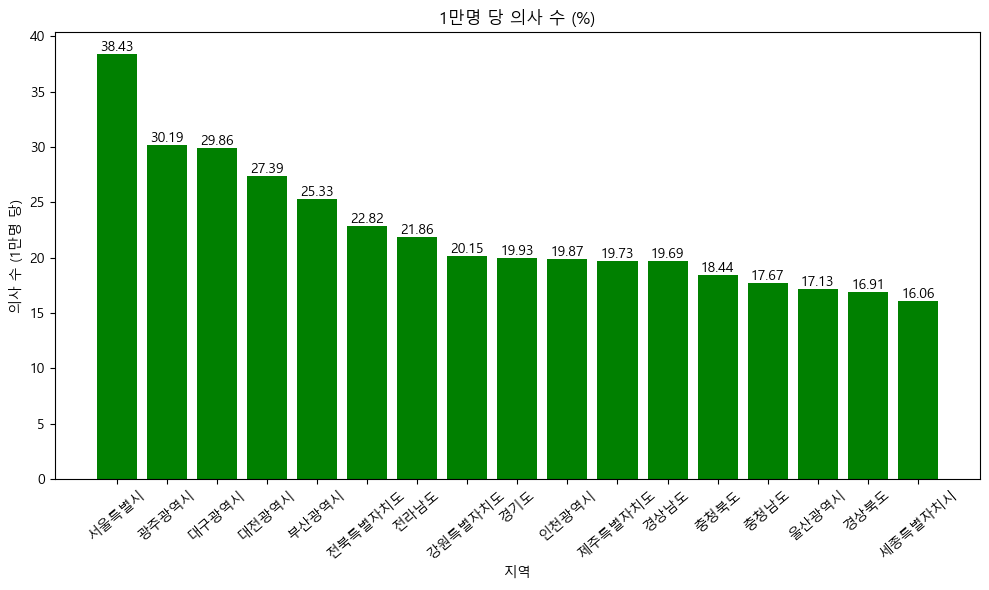

In [363]:
import matplotlib.pyplot as plt
# 그래프
plt.figure(figsize=(10, 6))
bars = plt.bar(kr_phNum_01['이름'], kr_phNum_01['인구 1만명 대비 의사수'], color='green')
plt.title('1만명 당 의사 수 (%)')
plt.xlabel('지역')
plt.ylabel('의사 수 (1만명 당)')
plt.xticks(rotation=40)  # x축 라벨 회전

# 숫자 표시
for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha = 'center', va = 'bottom')

plt.tight_layout()  # 레이아웃 조정하여 라벨이 잘리는 것을 방지
plt.show()

In [364]:
oecd_physicians_02

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,PHYSMEDE,Practising physicians,PERSMYNB,Number of persons (head counts),AUS,Australia,2011,2011,74100.00,E; B,Estimated value; Break
1,PHYSMEDE,Practising physicians,PERSMYNB,Number of persons (head counts),AUS,Australia,2012,2012,75258.00,E,Estimated value
2,PHYSMEDE,Practising physicians,PERSMYNB,Number of persons (head counts),AUS,Australia,2013,2013,77974.00,E; B,Estimated value; Break
3,PHYSMEDE,Practising physicians,PERSMYNB,Number of persons (head counts),AUS,Australia,2014,2014,80968.00,E,Estimated value
4,PHYSMEDE,Practising physicians,PERSMYNB,Number of persons (head counts),AUS,Australia,2015,2015,83490.00,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...
2215,PHYSMEDE,Practising physicians,DENSPPNB,Density per 1 000 population (head counts),ROU,Romania,2017,2017,2.93,NaN,NaN
2216,PHYSMEDE,Practising physicians,DENSPPNB,Density per 1 000 population (head counts),ROU,Romania,2018,2018,3.05,NaN,NaN
2217,PHYSMEDE,Practising physicians,DENSPPNB,Density per 1 000 population (head counts),ROU,Romania,2019,2019,3.19,B,Break
2218,PHYSMEDE,Practising physicians,DENSPPNB,Density per 1 000 population (head counts),ROU,Romania,2020,2020,3.33,NaN,NaN


In [365]:
# 헤더가 'Country', 'Variable', 'Year', 'Value', 'Measure' 출력
columns = ['Country', 'Variable', 'Year', 'Value', 'Measure', 'UNIT']
physicians = oecd_physicians_02[columns]
physicians


,Country,Variable,Year,Value,Measure,UNIT
0,Australia,Practising physicians,2011,74100.00,Number of persons (head counts),PERSMYNB
1,Australia,Practising physicians,2012,75258.00,Number of persons (head counts),PERSMYNB
2,Australia,Practising physicians,2013,77974.00,Number of persons (head counts),PERSMYNB
3,Australia,Practising physicians,2014,80968.00,Number of persons (head counts),PERSMYNB
4,Australia,Practising physicians,2015,83490.00,Number of persons (head counts),PERSMYNB
...,...,...,...,...,...,...
2215,Romania,Practising physicians,2017,2.93,Density per 1 000 population (head counts),DENSPPNB
2216,Romania,Practising physicians,2018,3.05,Density per 1 000 population (head counts),DENSPPNB
2217,Romania,Practising physicians,2019,3.19,Density per 1 000 population (head counts),DENSPPNB
2218,Romania,Practising physicians,2020,3.33,Density per 1 000 population (head counts),DENSPPNB


In [366]:
Greece = physicians[(physicians['Country'] == 'Greece') & (physicians['Variable'] == 'Physicians licensed to practice')]
physicians = physicians[physicians['Measure'] != 'Number of persons (head counts)']
physicians = physicians[physicians['UNIT'] != 'PERSMYNB']
physicians = physicians[physicians['Variable'] != 'Physicians licensed to practice']

In [367]:
# OECD 국가들 중 대한민국보다 먼저 고령화 단계에 진입한 국가 순서.
Japan = physicians[physicians['Country'] == 'Japan']
Italy = physicians[physicians['Country'] == 'Italy']
Germany = physicians[physicians['Country'] == 'Germany']
France = physicians[physicians['Country'] == 'France']
Sweden = physicians[physicians['Country'] == 'Sweden']
Netherlands = physicians[physicians['Country'] == 'Netherlands']
Belgium = physicians[physicians['Country'] == 'Belgium']
Denmark = physicians[physicians['Country'] == 'Denmark']
United_Kingdom = physicians[physicians['Country'] == 'United Kingdom']
Austria = physicians[physicians['Country'] == 'Austria']
Finland = physicians[physicians['Country'] == 'Finland']
Switzerland = physicians[physicians['Country'] == 'Switzerland']
Norway = physicians[physicians['Country'] == 'Norway']
Spain = physicians[physicians['Country'] == 'Spain']
Korea = physicians[physicians['Country'] == 'Korea']

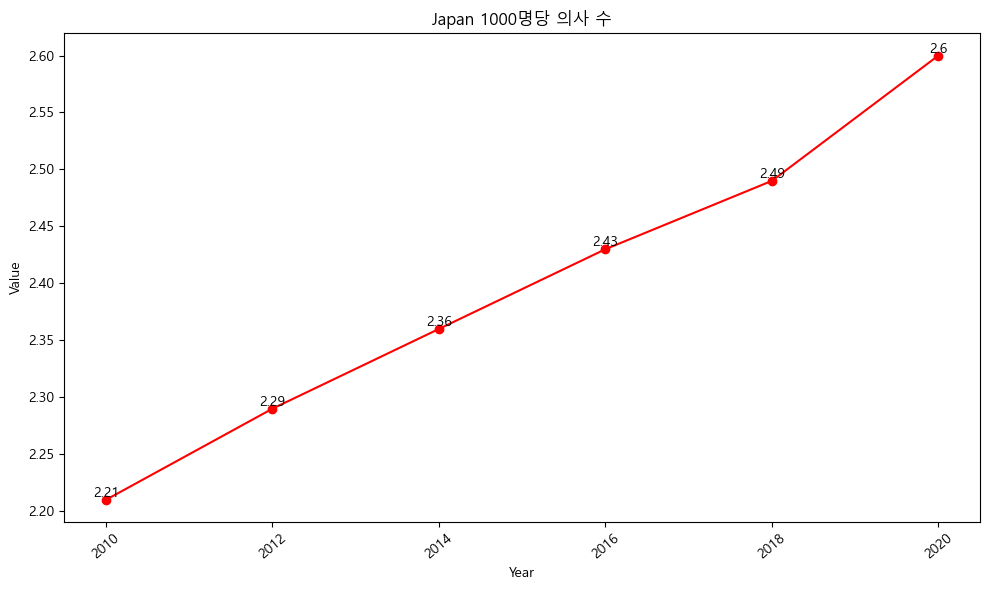

In [368]:
import matplotlib.pyplot as plt

# Japan 데이터 가져오기
japan_data = physicians[physicians['Country'] == 'Japan'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = japan_data['Year']
values = japan_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='red', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Japan 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

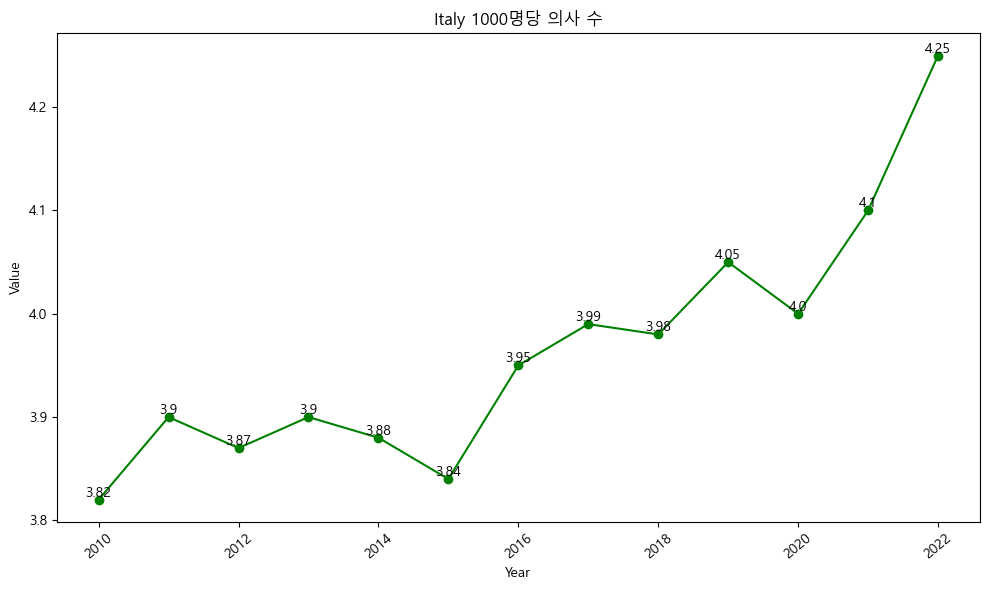

In [369]:
import matplotlib.pyplot as plt

# Italy 데이터 가져오기
Italy_data = physicians[physicians['Country'] == 'Italy'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = Italy_data['Year']
values = Italy_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='green', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Italy 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

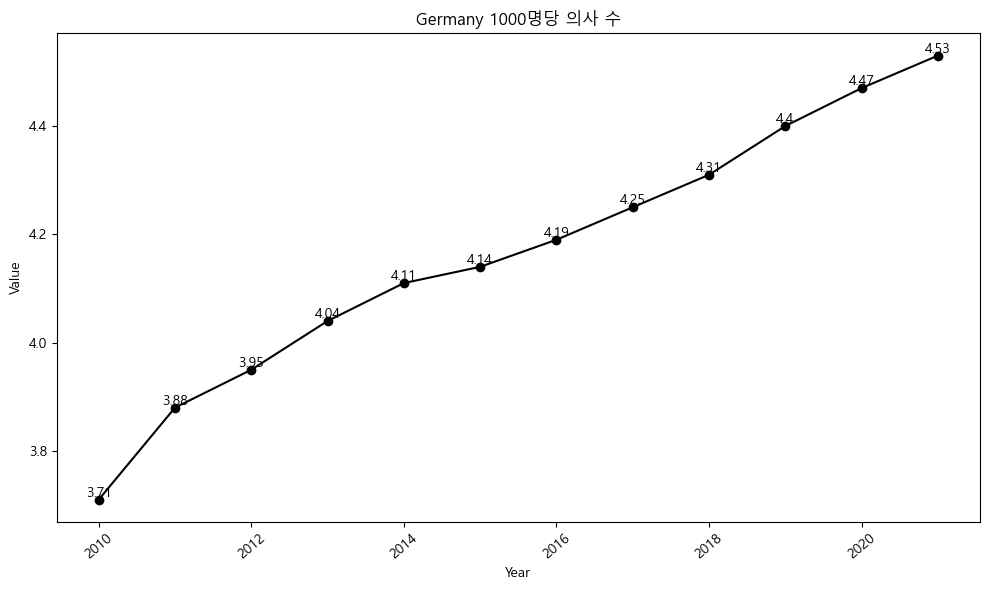

In [370]:
import matplotlib.pyplot as plt

# Germany 데이터 가져오기
Germany_data = physicians[physicians['Country'] == 'Germany'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = Germany_data['Year']
values = Germany_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='black', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Germany 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

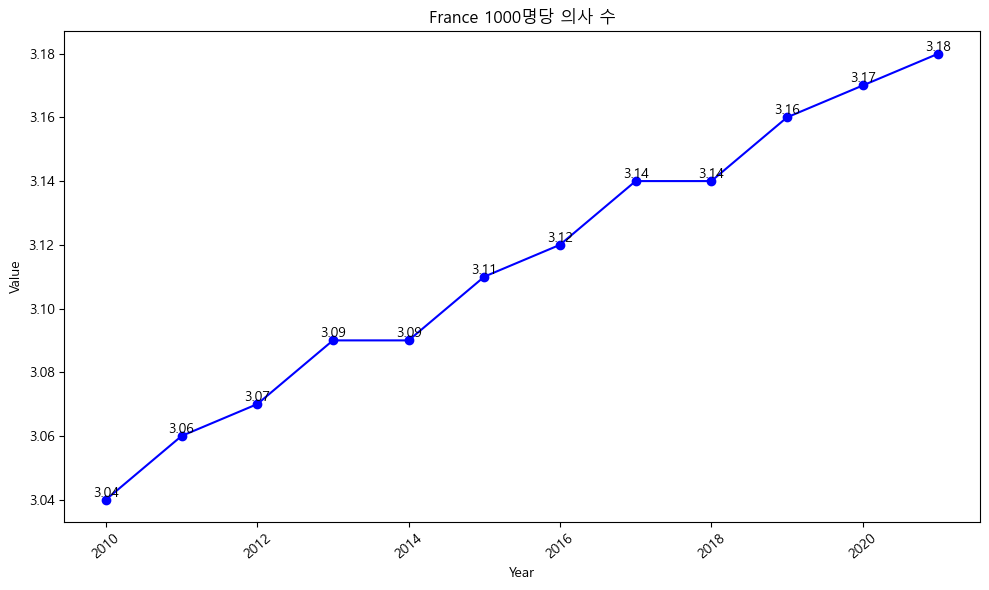

In [371]:
import matplotlib.pyplot as plt

# France 데이터 가져오기
France_data = physicians[physicians['Country'] == 'France'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = France_data['Year']
values = France_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='blue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('France 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

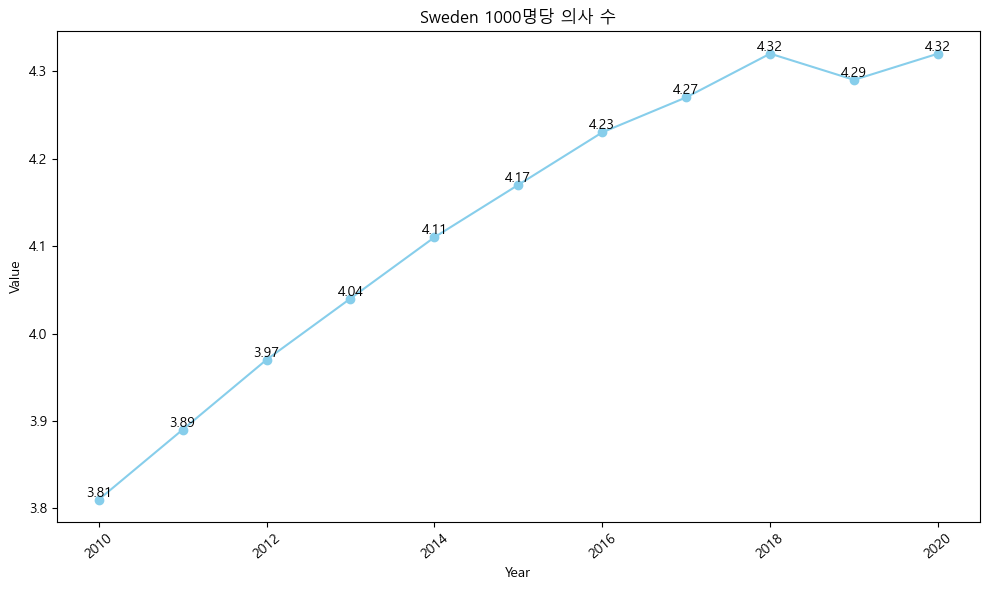

In [372]:
import matplotlib.pyplot as plt

# Sweden 데이터 가져오기
Sweden_data = physicians[physicians['Country'] == 'Sweden'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = Sweden_data['Year']
values = Sweden_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Sweden 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

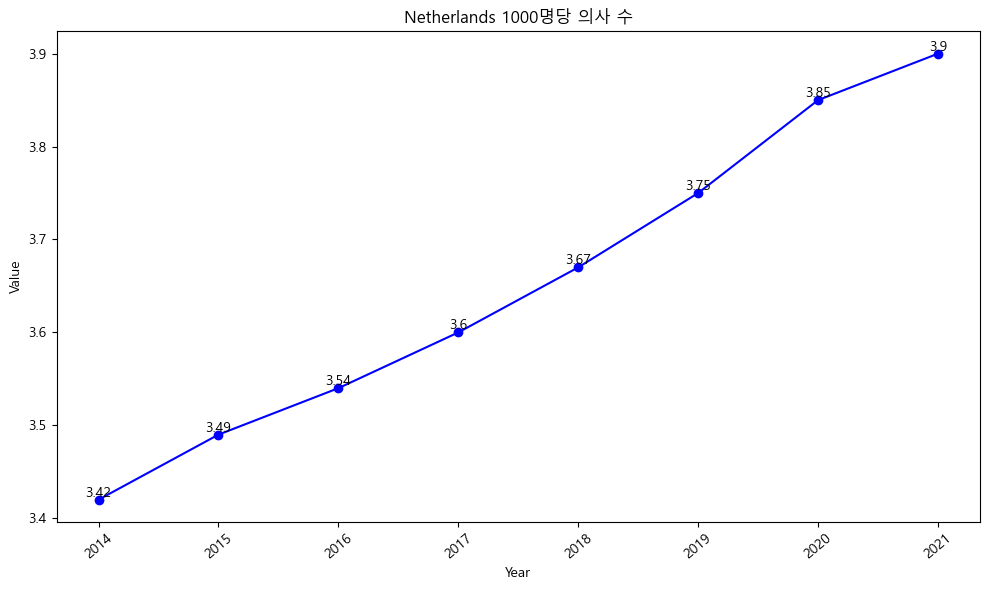

In [373]:
import matplotlib.pyplot as plt

# Netherlands 데이터 가져오기
netherlands_data = physicians[(physicians['Country'] == 'Netherlands') & (physicians['Variable'] == 'Practising physicians')]

# Year과 Value 가져오기
years = netherlands_data['Year']
values = netherlands_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='blue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Netherlands 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

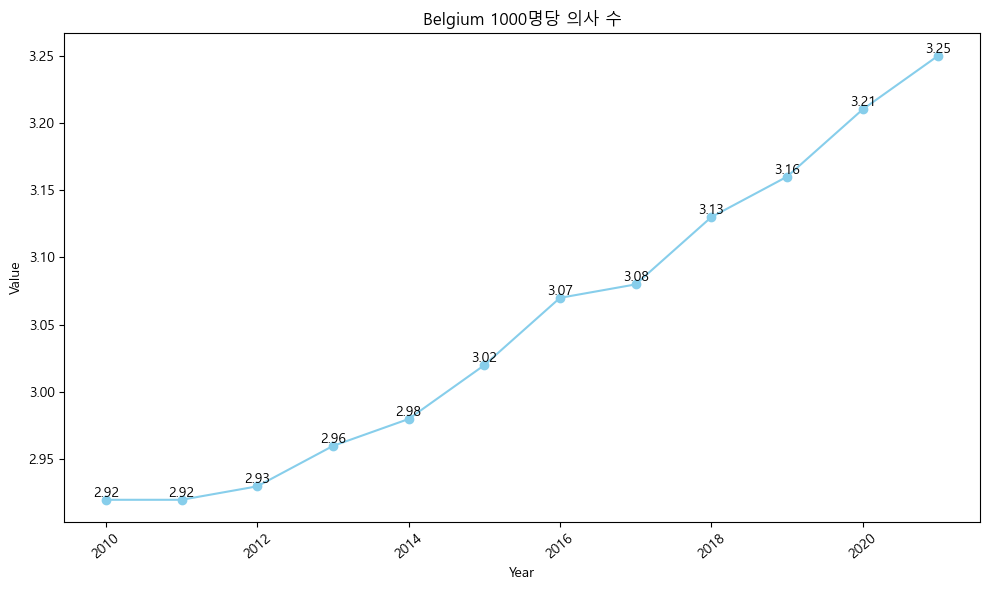

In [374]:
import matplotlib.pyplot as plt

# Belgium 데이터 가져오기
Belgium_data = physicians[physicians['Country'] == 'Belgium'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = Belgium_data['Year']
values = Belgium_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Belgium 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

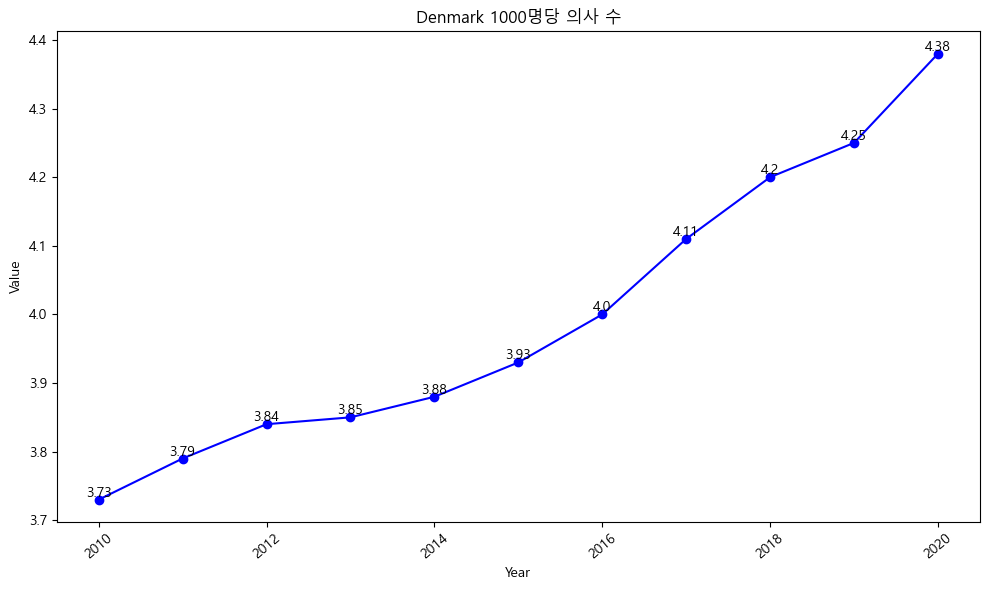

In [375]:
import matplotlib.pyplot as plt

# Denmark 데이터 가져오기
Denmark_data = physicians[(physicians['Country'] == 'Denmark') & (physicians['Variable'] == 'Practising physicians')]

# Year과 Value 가져오기
years = Denmark_data['Year']
values = Denmark_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='blue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Denmark 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

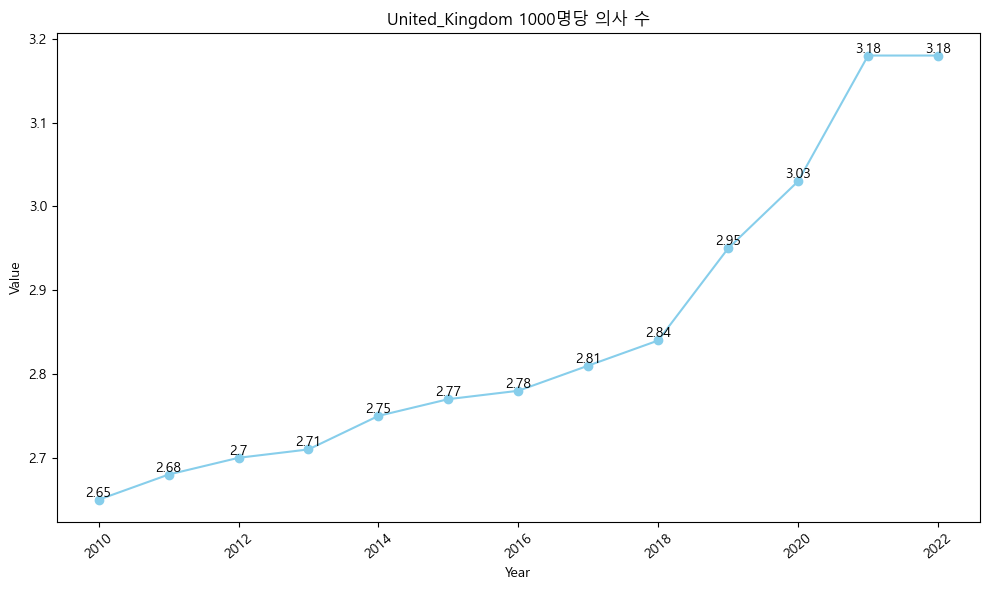

In [376]:
import matplotlib.pyplot as plt

# United_Kingdom 데이터 가져오기
United_Kingdom_data = physicians[physicians['Country'] == 'United Kingdom'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = United_Kingdom_data['Year']
values = United_Kingdom_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('United_Kingdom 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

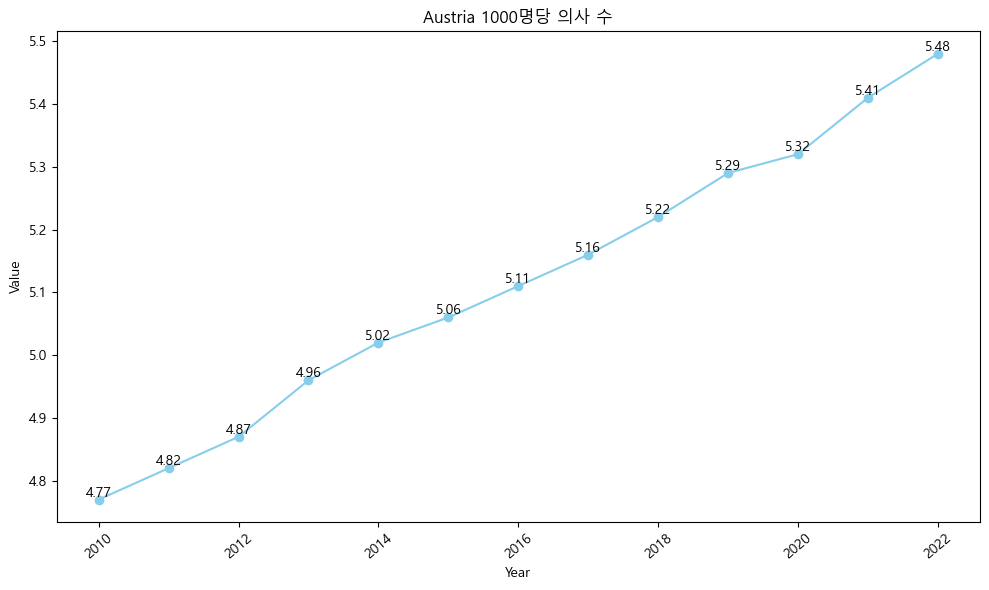

In [377]:
import matplotlib.pyplot as plt

# Austria 데이터 가져오기
Austria_data = physicians[physicians['Country'] == 'Austria'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = Austria_data['Year']
values = Austria_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Austria 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

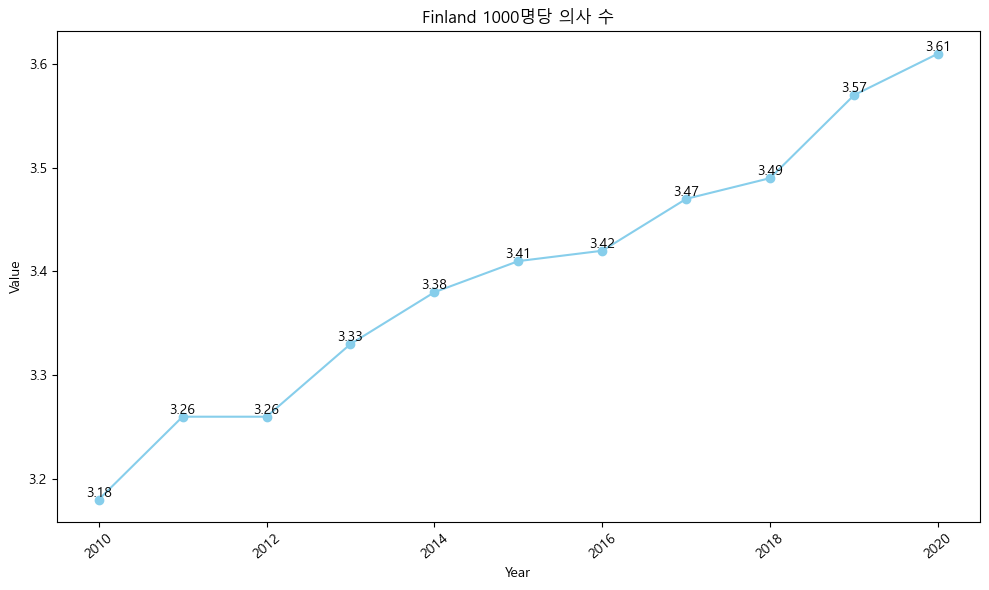

In [378]:
import matplotlib.pyplot as plt

# Finland 데이터 가져오기
Finland_data = physicians[physicians['Country'] == 'Finland'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = Finland_data['Year']
values = Finland_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Finland 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

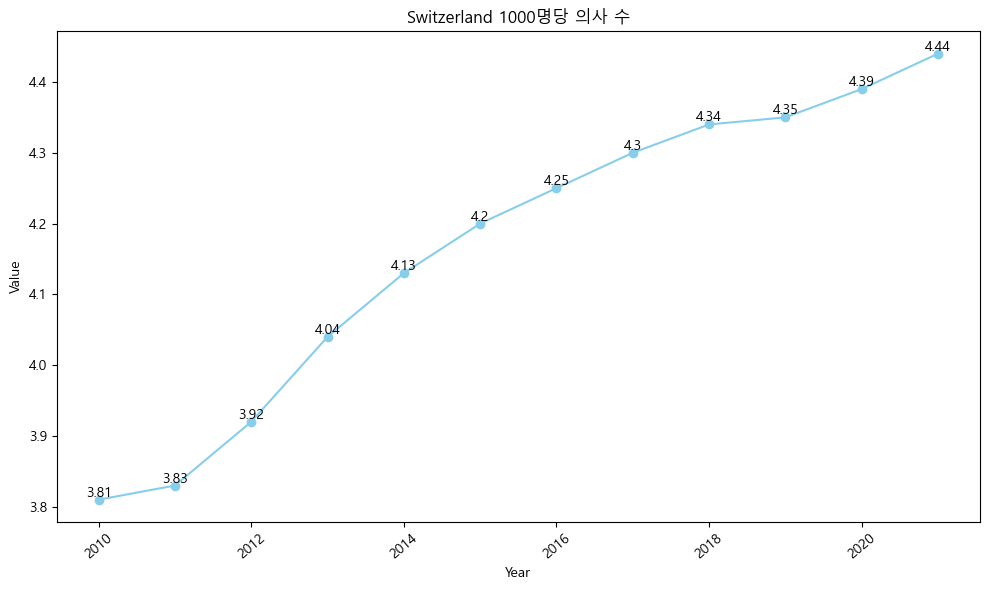

In [379]:
import matplotlib.pyplot as plt

# Switzerland 데이터 가져오기
Switzerland_data = physicians[physicians['Country'] == 'Switzerland'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = Switzerland_data['Year']
values = Switzerland_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Switzerland 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

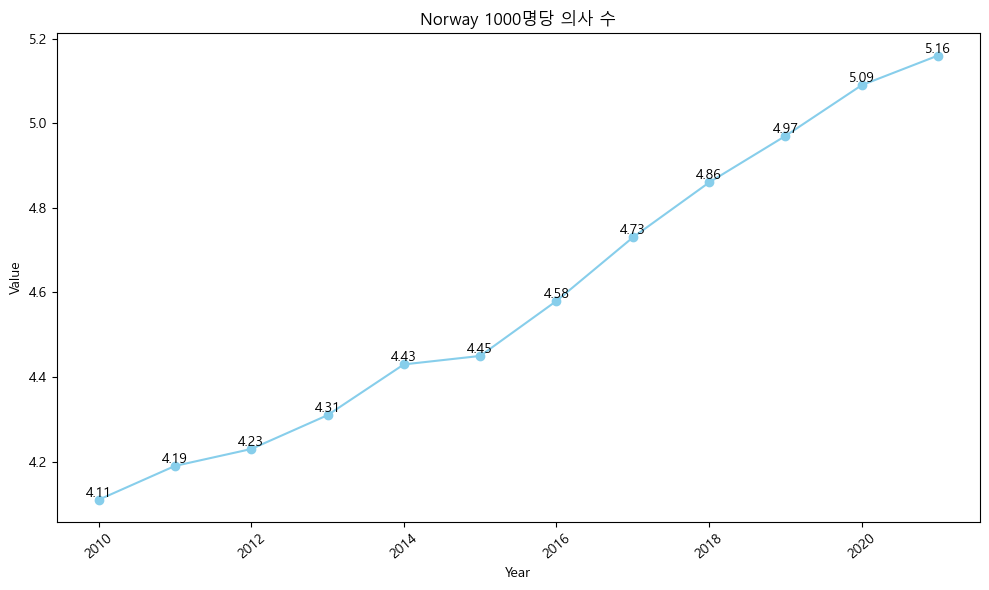

In [380]:
import matplotlib.pyplot as plt

# Norway 데이터 가져오기
Norway_data = physicians[physicians['Country'] == 'Norway'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = Norway_data['Year']
values = Norway_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Norway 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

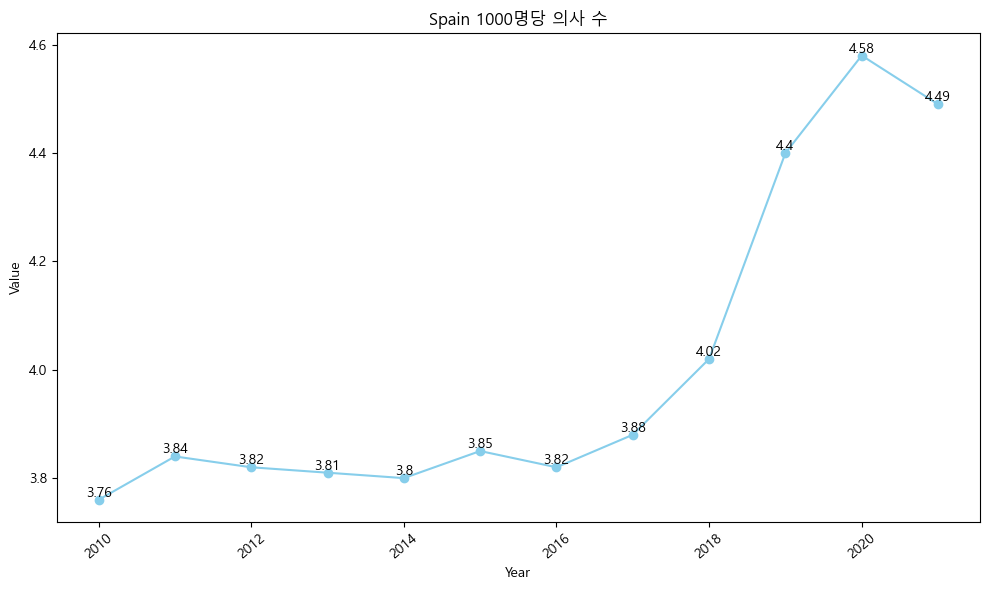

In [381]:
import matplotlib.pyplot as plt

# Spain 데이터 가져오기
Spain_data = physicians[physicians['Country'] == 'Spain'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = Spain_data['Year']
values = Spain_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Spain 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

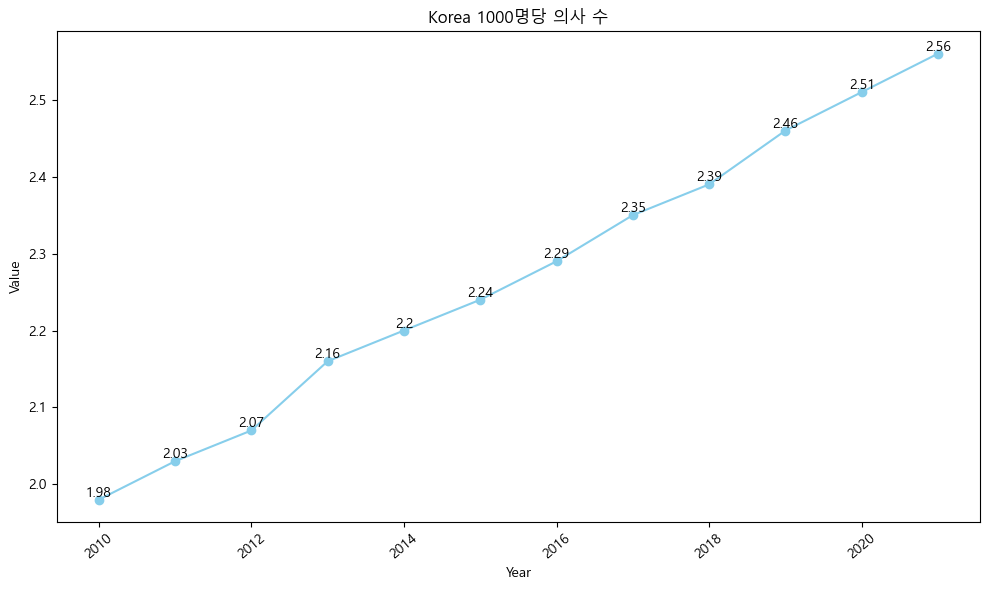

In [382]:
import matplotlib.pyplot as plt

# Korea 데이터 가져오기
Korea_data = physicians[physicians['Country'] == 'Korea'].drop_duplicates(subset='Year')

# Year과 Value 가져오기
years = Korea_data['Year']
values = Korea_data['Value']

# 점 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Korea 1000명당 의사 수')
plt.xticks(rotation=40)

# 점 위에 값 표시
for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

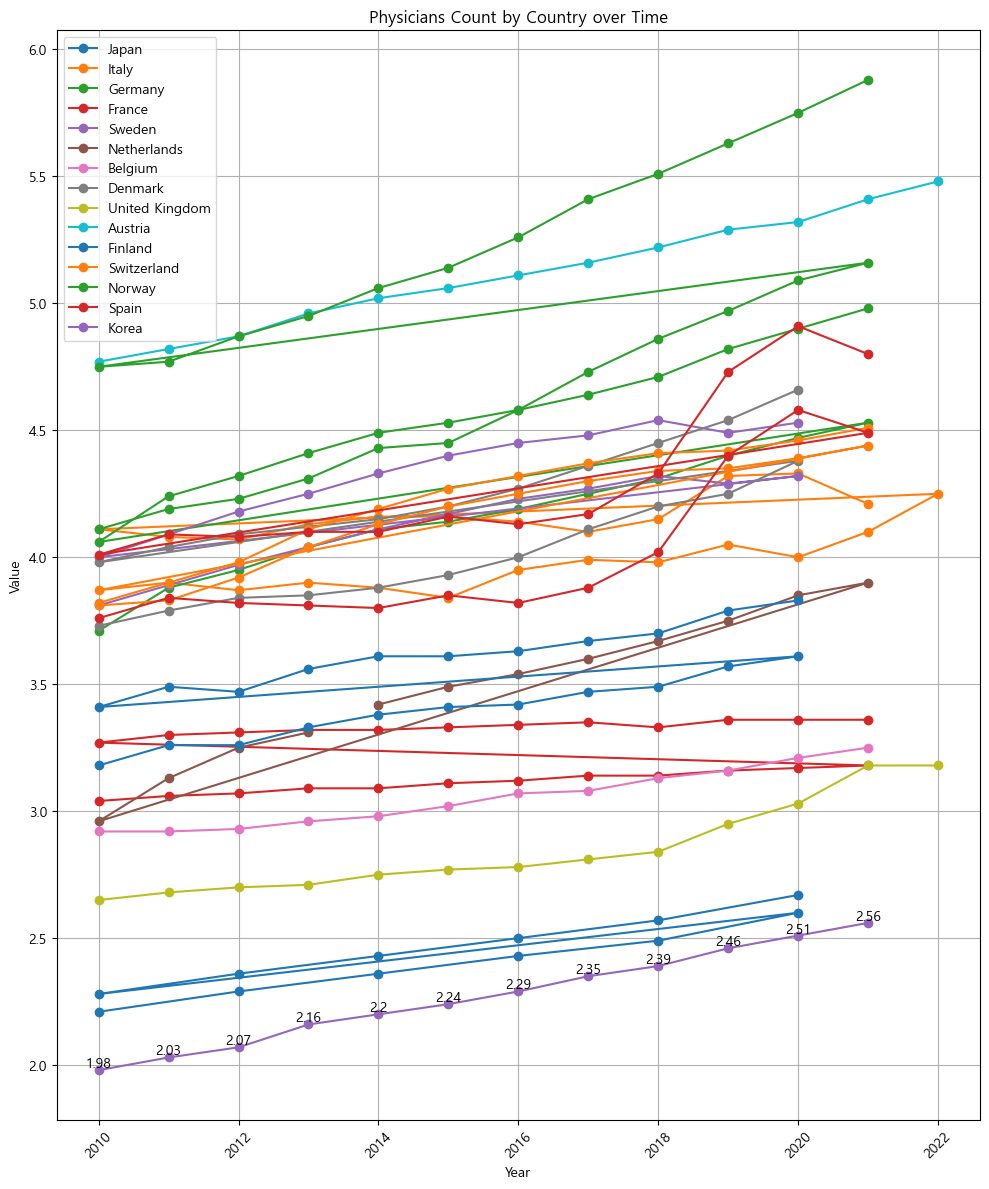

In [383]:
import matplotlib.pyplot as plt

# 각 국가별 데이터 가져오기
countries = ['Japan', 'Italy', 'Germany', 'France', 'Sweden', 'Netherlands', 'Belgium', 'Denmark',
             'United Kingdom', 'Austria', 'Finland', 'Switzerland', 'Norway', 'Spain', 'Korea']

plt.figure(figsize=(10, 12))

for country in countries:
    country_data = physicians[physicians['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Physicians Count by Country over Time')
plt.legend()
plt.grid(True)

for year, value in zip(years, values):
    plt.text(year, value, round(value, 2), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [384]:
salary_doc_oecd_03

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,RVNURMED,Remuneration of specialists,YSALXRMT,"Salaried, income, US$ exchange rate",BEL,Belgium,2010,2010,132062.82,E,Estimated value
1,RVNURMED,Remuneration of specialists,YSALXRMT,"Salaried, income, US$ exchange rate",BEL,Belgium,2011,2011,144154.61,E,Estimated value
2,RVNURMED,Remuneration of specialists,YSALXRMT,"Salaried, income, US$ exchange rate",BEL,Belgium,2012,2012,137361.09,E,Estimated value
3,RVNURMED,Remuneration of specialists,YSALXRMT,"Salaried, income, US$ exchange rate",BEL,Belgium,2013,2013,153950.74,E,Estimated value
4,RVNURMED,Remuneration of specialists,YSALXRMT,"Salaried, income, US$ exchange rate",BEL,Belgium,2014,2014,157563.81,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...
334,RVNURMED,Remuneration of specialists,YSALXRMT,"Salaried, income, US$ exchange rate",CRI,Costa Rica,2017,2017,53748.42,NaN,NaN
335,RVNURMED,Remuneration of specialists,YSALXRMT,"Salaried, income, US$ exchange rate",CRI,Costa Rica,2018,2018,54080.05,NaN,NaN
336,RVNURMED,Remuneration of specialists,YSALXRMT,"Salaried, income, US$ exchange rate",CRI,Costa Rica,2019,2019,53296.03,NaN,NaN
337,RVNURMED,Remuneration of specialists,YSALXRMT,"Salaried, income, US$ exchange rate",CRI,Costa Rica,2020,2020,47525.85,NaN,NaN


In [385]:
columns_03 = ['Country','Variable', 'Year', 'Value']
salarys = salary_doc_oecd_03[columns_03]
unique_countries = salarys['Country'].unique()
unique_countries

array(['Belgium', 'Czechia', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Korea',
       'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Slovak Republic', 'Spain', 'Sweden',
       'Türkiye', 'United Kingdom', 'Chile', 'Estonia', 'Israel',
       'Slovenia', 'Latvia', 'Lithuania', 'Costa Rica', 'Croatia'],
      dtype=object)

In [386]:
belgium_data = salarys.loc[salarys['Country'] == 'Belgium']
Czechia_data = salarys.loc[salarys['Country'] == 'Czechia']
Denmark_data = salarys.loc[salarys['Country'] == 'Denmark']
Finland_data = salarys.loc[salarys['Country'] == 'Finland']
France_data = salarys.loc[salarys['Country'] == 'France']
Germany_data = salarys.loc[salarys['Country'] == 'Germany']
Greece_data = salarys.loc[salarys['Country'] == 'Greece']
Hungary_data = salarys.loc[salarys['Country'] == 'Hungary']
Iceland_data = salarys.loc[salarys['Country'] == 'Iceland']
Ireland_data = salarys.loc[salarys['Country'] == 'Ireland']
Italy_data = salarys.loc[salarys['Country'] == 'Italy']
Korea_data = salarys.loc[salarys['Country'] == 'Korea']
Luxembourg_data = salarys.loc[salarys['Country'] == 'Luxembourg']
Mexico_data = salarys.loc[salarys['Country'] == 'Mexico']
Netherlands_data = salarys.loc[salarys['Country'] == 'Netherlands']
New_Zealand_data = salarys.loc[salarys['Country'] == 'New Zealand']
Norway_data = salarys.loc[salarys['Country']== 'Norway']
Poland_data = salarys.loc[salarys['Country'] == 'Poland']
Portugal_data = salarys.loc[salarys['Country'] == 'Portugal']
Slovak_Republic_data = salarys.loc[salarys['Country'] == 'Slovak Republic']
Spain_data = salarys.loc[salarys['Country'] == 'Spain']
Sweden_data = salarys.loc[salarys['Country'] == 'Sweden']
Türkiye_data = salarys.loc[salarys['Country'] == 'Türkiye']
United_Kingdom_data = salarys.loc[salarys['Country'] == 'United Kingdom']
Chile_data = salarys.loc[salarys['Country'] == 'Chile']
Estonia_data = salarys.loc[salarys['Country'] == 'Estonia']
Israel_data = salarys.loc[salarys['Country'] == 'Israel']
Slovenia_data = salarys.loc[salarys['Country'] == 'Slovenia']
Latvia_data = salarys.loc[salarys['Country'] == 'Latvia']
Lithuania_data = salarys.loc[salarys['Country'] == 'Lithuania']
Costa_Rica_data = salarys.loc[salarys['Country'] == 'Costa Rica']
Croatia_data = salarys.loc[salarys['Country'] == 'Croatia']

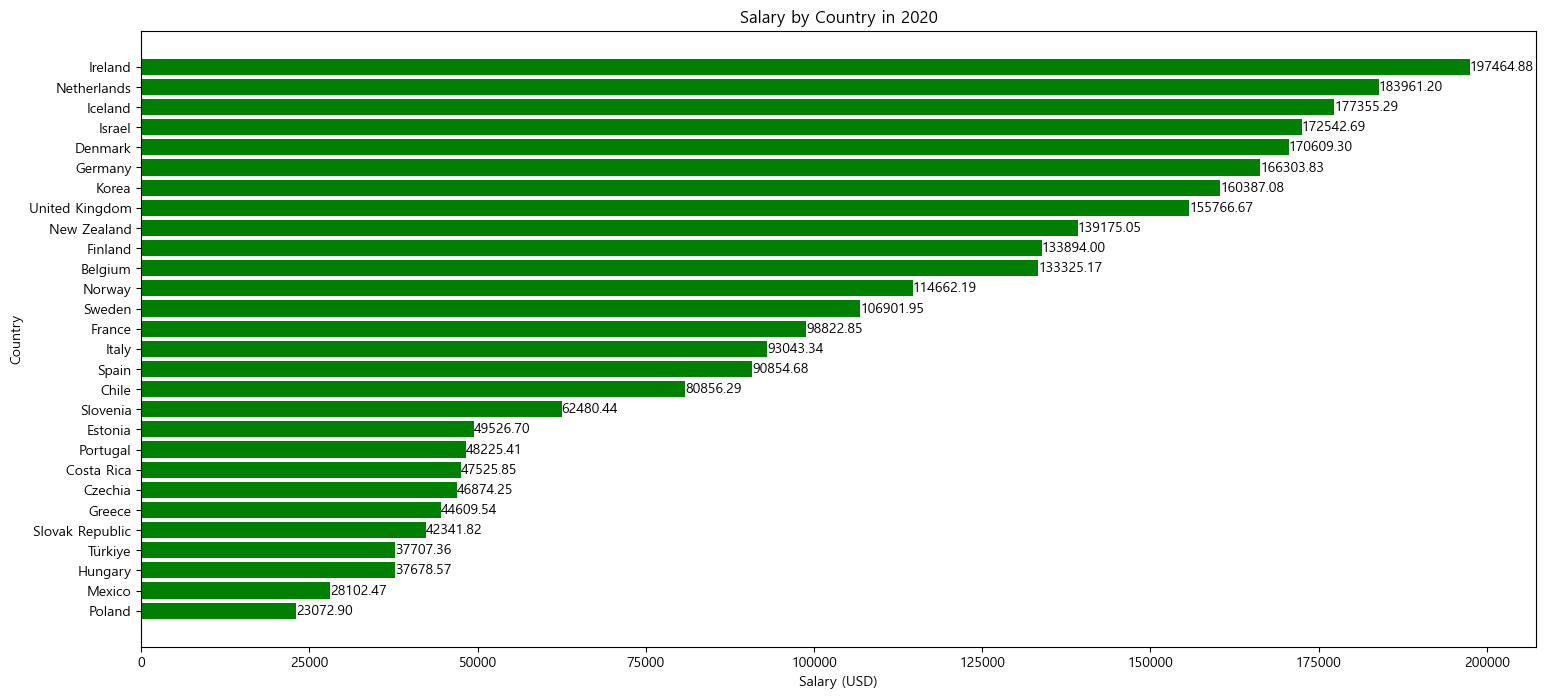

In [511]:
import matplotlib.pyplot as plt

# 각 국가의 2020년 연봉 데이터 가져오기
data_2020 = salarys[salarys['Year'] == 2020]

# 2020년 연봉을 기준으로 내림차순 정렬
sorted_data = data_2020.sort_values(by='Value', ascending=False)

# 시각화
plt.figure(figsize=(18, 8))
bars = plt.barh(sorted_data['Country'], sorted_data['Value'], color='green')
plt.xlabel('Salary (USD)')
plt.ylabel('Country')
plt.title('Salary by Country in 2020')
plt.gca().invert_yaxis()  # y축 순서 뒤집기

# 각 막대의 오른쪽 끝에 값 출력
for bar, value in zip(bars, sorted_data['Value']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', ha='left')

plt.show()

In [512]:
per_gdp_salary_04

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,RVNURMED,Remuneration of specialists,YSALGDMT,"Salaried, income, /capita GDP",BEL,Belgium,2010,2010,2.99,E,Estimated value
1,RVNURMED,Remuneration of specialists,YSALGDMT,"Salaried, income, /capita GDP",BEL,Belgium,2011,2011,3.04,E,Estimated value
2,RVNURMED,Remuneration of specialists,YSALGDMT,"Salaried, income, /capita GDP",BEL,Belgium,2012,2012,3.07,E,Estimated value
3,RVNURMED,Remuneration of specialists,YSALGDMT,"Salaried, income, /capita GDP",BEL,Belgium,2013,2013,3.29,E,Estimated value
4,RVNURMED,Remuneration of specialists,YSALGDMT,"Salaried, income, /capita GDP",BEL,Belgium,2014,2014,3.30,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...
335,RVNURMED,Remuneration of specialists,YSALGDMT,"Salaried, income, /capita GDP",CRI,Costa Rica,2017,2017,4.39,NaN,NaN
336,RVNURMED,Remuneration of specialists,YSALGDMT,"Salaried, income, /capita GDP",CRI,Costa Rica,2018,2018,4.33,NaN,NaN
337,RVNURMED,Remuneration of specialists,YSALGDMT,"Salaried, income, /capita GDP",CRI,Costa Rica,2019,2019,4.18,NaN,NaN
338,RVNURMED,Remuneration of specialists,YSALGDMT,"Salaried, income, /capita GDP",CRI,Costa Rica,2020,2020,3.89,NaN,NaN


In [513]:
work_hr_kr_oecd_mean_05

,한국,Unnamed: 1,Unnamed: 2,OECD 평균
0,연도,근로시간,증감률,근로시간
1,2008,2228,NaN,1788
2,2009,2174,-2.4,1753
3,2010,2163,-0.5,1772
4,2011,2136,-1.2,1772
5,2012,2119,-0.8,1770
6,2013,2106,-0.6,1766
7,2014,2076,-1.4,1768
8,2015,2083,0.3,1767


In [514]:
older_kr_06

,년도,대한민국의 노인 비율
0,1960,3.3%
1,1970,3.4%
2,1980,3.8%
3,1990,4.8%
4,2000,6.8%
5,2010,10.7%
6,2020,15.0%
7,2030,24.1%
8,2040,32.8%
9,2050,39.0%


In [515]:
city_kor_doc_07

,시군구별(1),2014.4/4,2015.4/4,2016.4/4,2017.4/4,2018.4/4,2019.4/4,2020.4/4,2021.4/4,2022.4/4,2023.4/4
0,시군구별(1),의사,의사,의사,의사,의사,의사,의사,의사,의사,의사
1,전체,92927,95076,97713,100241,102471,105628,107976,109937,112321,114699
2,서울,27465,27726,28189,28746,29378,30359,31140,32045,32704,33868
3,부산,7341,7538,7637,7735,7852,8008,8102,8219,8356,8460
4,대구,5195,5335,5495,5552,5721,5908,6013,6083,6192,6335
5,인천,4167,4351,4469,4684,4893,5071,5130,5208,5375,5661
6,광주,3194,3292,3434,3497,3547,3658,3676,3659,3751,3783
7,대전,3307,3399,3455,3545,3629,3726,3680,3722,3773,3793
8,울산,1542,1633,1702,1729,1726,1754,1762,1789,1808,1838
9,세종,124,159,180,239,270,302,441,458,496,524


In [516]:
ten_yrs_local_kr_doc_08

,행정구역(시군구)별,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,행정구역(시군구)별,총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명)
1,전국,51327916,51529338,51696216,51778544,51826059,51849861,51829023,51638809,51439038,51325329
2,서울특별시,10103233,10022181,9930616,9857426,9765623,9729107,9668465,9509458,9428372,9386034
3,부산광역시,3519401,3513777,3498529,3470653,3441453,3413841,3391946,3350380,3317812,3293362
4,대구광역시,2493264,2487829,2484557,2475231,2461769,2438031,2418346,2385412,2363691,2374960
5,인천광역시,2902608,2925815,2943069,2948542,2954642,2957026,2942828,2948375,2967314,2997410
6,광주광역시,1475884,1472199,1469214,1463770,1459336,1456468,1450062,1441611,1431050,1419237
7,대전광역시,1531809,1518775,1514370,1502227,1489936,1474870,1463882,1452251,1446072,1442216
8,울산광역시,1166377,1173534,1172304,1165132,1155623,1148019,1136017,1121592,1110663,1103661
9,세종특별자치시,156125,210884,243048,280100,314126,340575,355831,371895,383591,386525
